# Task 6. Binary Logistic Regression

File **bank-additional-full.csv** contains records relevant to a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

[Source](https://www.kaggle.com/code/kerneler/starter-bank-additional-full-csv-f1e01875-e)

**Variables:**

Bank client data
- age (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (categorical)
- housing: has housing loan? (categorical)
- loan: has personal loan? (categorical)

Related with the last contact of the current campaign
- contact: contact communication type (categorical)
- month: last contact month of year (categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric). 
*! Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

Other attributes
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target)
- y - has the client subscribed a term deposit? (binary: 'yes','no')

Please complete the following tasks.

1. Select not less than 9 predictors. Out of them at least 3 predictors should be categorical. Prove that the selected predictors could be used simultaneously in one binary regression model. Formulate the research hypotheses which will be verified during the regression analysis.

In [148]:
# your code here

# i have replaced all ; to , at csv to fix it 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('bank-additional-full.csv', )
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [150]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [151]:
# so we start our analysis with dependent variable exploration.

df['y'].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [152]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [153]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age' 'duration' 'campaign' 'pdays' 'previous']

Type: object
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']

Type: float64
['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']



In [154]:
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'poutcome', 'y']

In [155]:
df[num_vars]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [156]:
# vry long thing
# sns.pairplot(df, hue='y')

<Axes: >

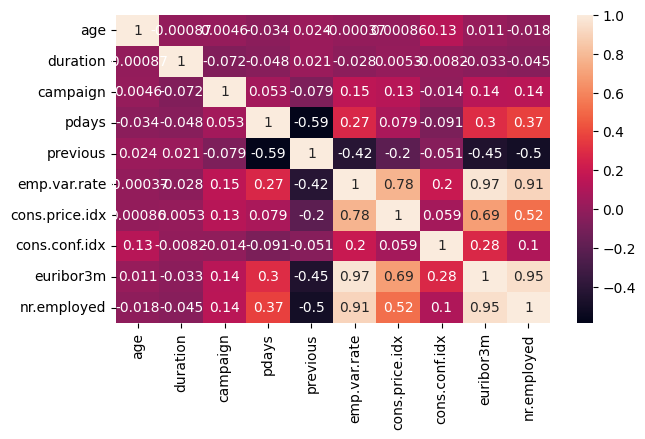

In [157]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [158]:
# lets run chi square test to get relations betwwen cat varialbes


df_categorical_vars = df[cat_vars]


df_categorical_vars

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


Будут протестированы категориальные переменные: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']



Парные χ² тесты (отсортировано по Cramér's V):


,var1,var2,chi2_stat,p_value,p_bonf,p_fdr,dof,cramers_v,frac_expected_lt5,fisher_p
0,housing,loan,41276.913210,0.000000e+00,0.000000e+00,0.000000e+00,4,0.707870,0.000000,NaN
1,contact,month,15288.827616,0.000000e+00,0.000000e+00,0.000000e+00,9,0.609259,0.000000,NaN
2,job,education,37338.135156,0.000000e+00,0.000000e+00,0.000000e+00,77,0.359867,0.125000,NaN
3,month,poutcome,4858.012348,0.000000e+00,0.000000e+00,0.000000e+00,18,0.242845,0.000000,NaN
4,contact,poutcome,2422.430782,0.000000e+00,0.000000e+00,0.000000e+00,2,0.242516,0.000000,NaN
5,job,marital,4197.469143,0.000000e+00,0.000000e+00,0.000000e+00,33,0.184310,0.145833,NaN
6,education,default,2404.517761,0.000000e+00,0.000000e+00,0.000000e+00,14,0.170849,0.375000,NaN
7,job,default,1927.657874,0.000000e+00,0.000000e+00,0.000000e+00,22,0.152973,0.333333,NaN
8,default,contact,758.807031,1.687123e-165,7.592053e-164,5.840041e-165,2,0.135731,0.333333,NaN
9,job,contact,684.285960,1.258932e-139,5.665192e-138,3.540745e-139,11,0.128894,0.000000,NaN



Пары с большим числом малых ожидаемых частот (>25% ячеек <5):


,var1,var2,frac_expected_lt5,cramers_v,p_value
6,education,default,0.375000,0.170849,0.000000e+00
7,job,default,0.333333,0.152973,0.000000e+00
8,default,contact,0.333333,0.135731,1.687123e-165
12,default,month,0.333333,0.112895,1.506591e-211
16,marital,default,0.333333,0.095813,4.425322e-160
18,default,poutcome,0.333333,0.076943,3.093128e-104
36,default,day_of_week,0.333333,0.015004,1.750044e-02
39,default,housing,0.333333,0.012663,1.030090e-02
42,default,loan,0.333333,0.007142,3.793187e-01


Рекомендации: для таких пар используйте объединение уровней, Fisher (если 2x2) или бутстрэп/симуляцию.


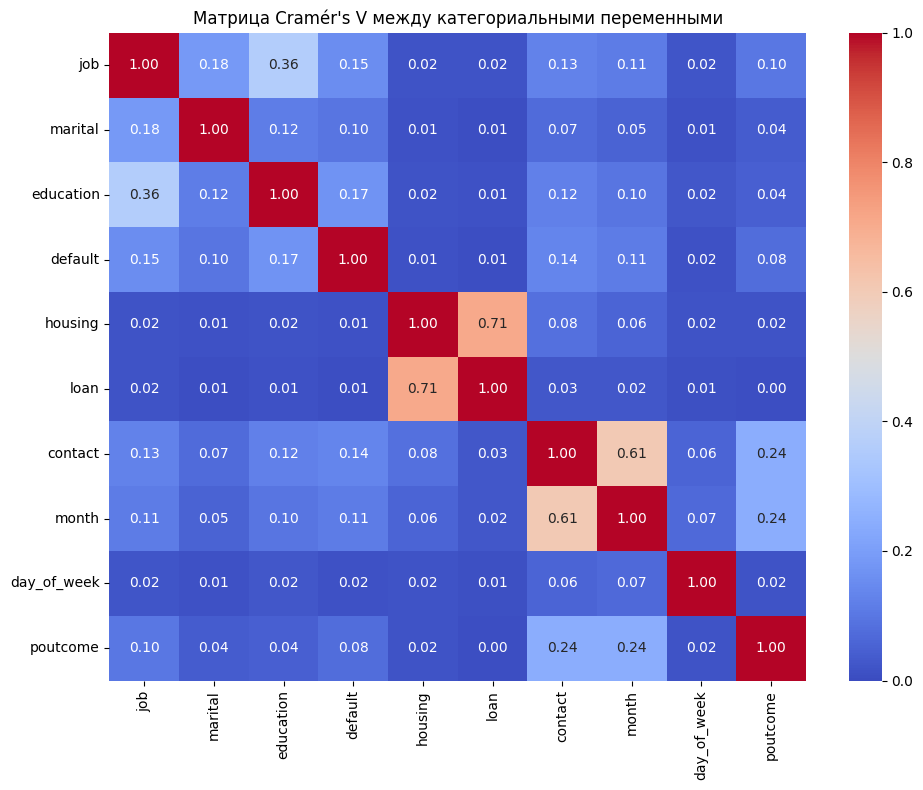


Визуализация для пары housing vs loan (Cramér's V = 0.708, p=0.000e+00)


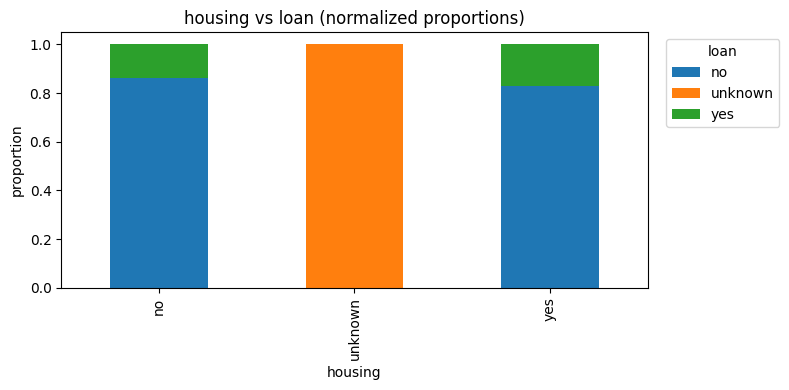


Визуализация для пары contact vs month (Cramér's V = 0.609, p=0.000e+00)


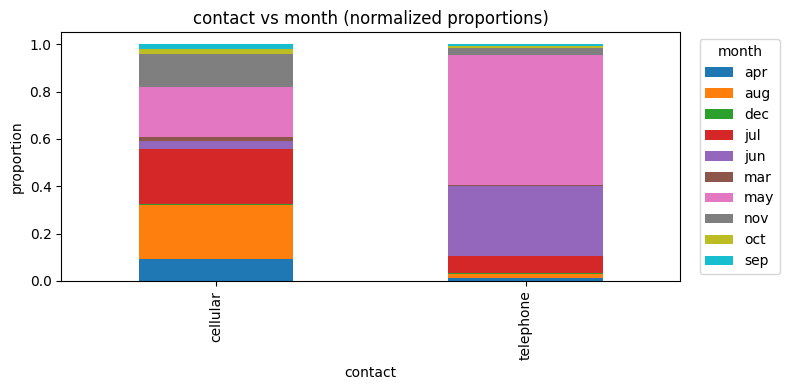


Визуализация для пары job vs education (Cramér's V = 0.360, p=0.000e+00)


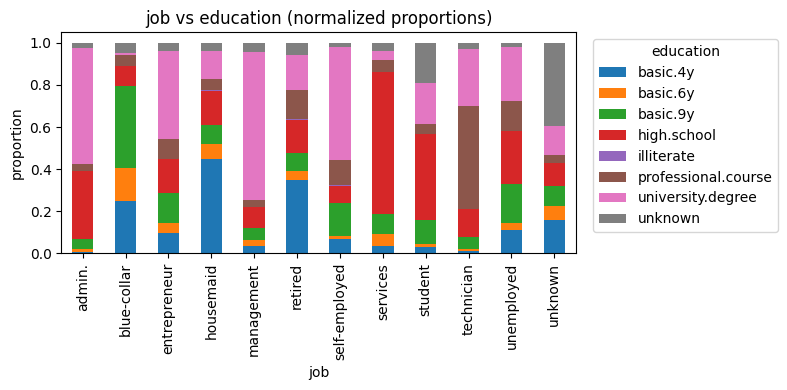


Визуализация для пары month vs poutcome (Cramér's V = 0.243, p=0.000e+00)


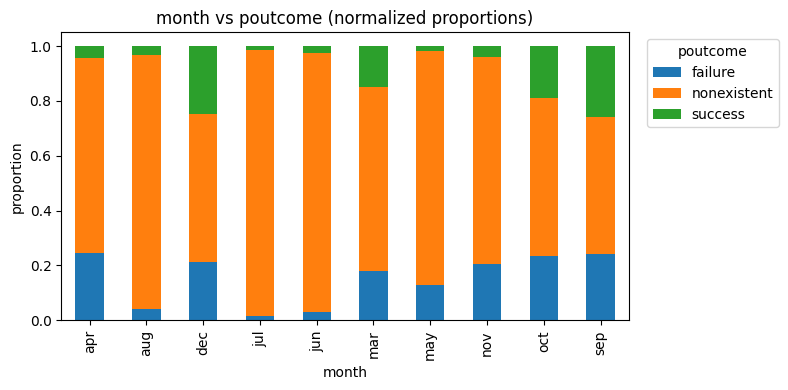


Интерпретация:
- Если p_value (chi2) < 0.05 -> зависимость статистически значима (при больших n тест чувствителен).
- Cramér's V оценивает силу связи: ориентиры V<0.1 слабая/нет, 0.1-0.2 слабая, 0.2-0.4 умеренная, >0.4 сильная.
- Если много ячеек с ожиданием <5 — осторожно: χ² может быть ненадёжен; для 2x2 используйте Fisher, иначе объединяйте уровни или применяйте симуляции/бутстрэп.


In [159]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import csv
from pathlib import Path
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests
import math
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. Загрузка данных (автоопределяем разделитель) ----------


# ---------- 2. Список категориальных переменных (подставьте свои если нужно) ----------
cat_vars = ['job','marital','education','default','housing','loan',
            'contact','month','day_of_week','poutcome']  # не включаем y сюда по умолчанию

# Оставляем только те, что реально есть в df
cat_vars = [c for c in cat_vars if c in df.columns]
print("Будут протестированы категориальные переменные:", cat_vars)

# ---------- 3. Функции: χ², Cramér's V и проверка ожидаемых частот ----------
def cramers_v_from_ct(ct):
    """Cramer's V для таблицы сопряжённости (DataFrame или ndarray)"""
    if isinstance(ct, pd.DataFrame):
        mat = ct.values
    else:
        mat = np.asarray(ct)
    chi2, p, dof, expected = chi2_contingency(mat, correction=False)
    n = mat.sum()
    if n == 0:
        return np.nan
    r, k = mat.shape
    denom = n * min(k-1, r-1)
    if denom == 0:
        return np.nan
    return math.sqrt(chi2 / denom)

def chi2_test_with_diagnostics(a, b, df):
    """
    Возвращает словарь с результатами χ2 теста между колонками a и b:
    chi2_stat, p_value, dof, expected_matrix, frac_expected_lt5, cramers_v, fisher_p_if_2x2
    """
    ct = pd.crosstab(df[a], df[b])
    # если пустая таблица или одна из переменных константа — вернуть nan
    if ct.size == 0 or ct.shape[0] < 2 or ct.shape[1] < 2:
        return {'var1': a, 'var2': b, 'chi2_stat': np.nan, 'p_value': np.nan, 'dof': np.nan,
                'frac_expected_lt5': np.nan, 'cramers_v': np.nan, 'fisher_p': np.nan}
    chi2, p, dof, expected = chi2_contingency(ct, correction=False)
    # доля ячеек с ожидаемой частотой < 5
    expected = np.array(expected, dtype=float)
    frac_lt5 = (expected < 5).sum() / expected.size
    # Cramer's V
    v = cramers_v_from_ct(ct)
    # Fisher exact only for 2x2
    fisher_p = np.nan
    if ct.shape == (2,2):
        try:
            _, fisher_p = fisher_exact(ct)
        except Exception:
            fisher_p = np.nan
    return {'var1': a, 'var2': b, 'chi2_stat': float(chi2), 'p_value': float(p), 'dof': int(dof),
            'frac_expected_lt5': float(frac_lt5), 'cramers_v': float(v), 'fisher_p': fisher_p}

# ---------- 4. Запуск парных тестов (все пары) ----------
results = []
for i in range(len(cat_vars)):
    for j in range(i+1, len(cat_vars)):
        a = cat_vars[i]; b = cat_vars[j]
        res = chi2_test_with_diagnostics(a, b, df)
        results.append(res)

res_df = pd.DataFrame(results)

# ---------- 5. Коррекция p-values (мульти-тестирование) ----------
if not res_df.empty:
    # Bonferroni и Benjamini-Hochberg (FDR)
    res_df['p_bonf'] = multipletests(res_df['p_value'].fillna(1.0), method='bonferroni')[1]
    res_df['p_fdr'] = multipletests(res_df['p_value'].fillna(1.0), method='fdr_bh')[1]

# ---------- 6. Сортировка и вывод наиболее сильных связей ----------
res_sorted = res_df.sort_values('cramers_v', ascending=False).reset_index(drop=True)
pd.set_option('display.max_rows', 200)
print("\nПарные χ² тесты (отсортировано по Cramér's V):")
display(res_sorted[['var1','var2','chi2_stat','p_value','p_bonf','p_fdr','dof','cramers_v','frac_expected_lt5','fisher_p']].head(40))

# ---------- 7. Отчёт по нарушению допущений ----------
# Покажем пары, где >25% ячеек ожидаемых <5 (часто считают проблемой)
flagged = res_sorted[res_sorted['frac_expected_lt5'] > 0.25]
if not flagged.empty:
    print("\nПары с большим числом малых ожидаемых частот (>25% ячеек <5):")
    display(flagged[['var1','var2','frac_expected_lt5','cramers_v','p_value']])
    print("Рекомендации: для таких пар используйте объединение уровней, Fisher (если 2x2) или бутстрэп/симуляцию.")
else:
    print("\nНет пар с долей ожидаемых ячеек <5 > 25% — допущение χ² в целом соблюдается.")

# ---------- 8. Матрица Cramer's V (heatmap) ----------
V = pd.DataFrame(index=cat_vars, columns=cat_vars, dtype=float)
for a in cat_vars:
    for b in cat_vars:
        if a == b:
            V.loc[a,b] = 1.0
        else:
            ct = pd.crosstab(df[a], df[b])
            V.loc[a,b] = cramers_v_from_ct(ct)

plt.figure(figsize=(10,8))
sns.heatmap(V.astype(float), annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=1)
plt.title("Матрица Cramér's V между категориальными переменными")
plt.tight_layout()
plt.show()

# ---------- 9. Визуализация для топ-пар (опционально) ----------
top_n = 4
top_pairs = res_sorted.head(top_n)
for idx, row in top_pairs.iterrows():
    a, b = row['var1'], row['var2']
    print(f"\nВизуализация для пары {a} vs {b} (Cramér's V = {row['cramers_v']:.3f}, p={row['p_value']:.3e})")
    ct = pd.crosstab(df[a], df[b])
    # нормализованный stacked bar (по строкам)
    ct_norm = ct.div(ct.sum(axis=1), axis=0)
    ct_norm.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(f"{a} vs {b} (normalized proportions)")
    plt.ylabel("proportion")
    plt.legend(title=b, bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout()
    plt.show()

# ---------- 10. Интерпретация результата ----------
print("\nИнтерпретация:")
print("- Если p_value (chi2) < 0.05 -> зависимость статистически значима (при больших n тест чувствителен).")
print("- Cramér's V оценивает силу связи: ориентиры V<0.1 слабая/нет, 0.1-0.2 слабая, 0.2-0.4 умеренная, >0.4 сильная.")
print("- Если много ячеек с ожиданием <5 — осторожно: χ² может быть ненадёжен; для 2x2 используйте Fisher, иначе объединяйте уровни или применяйте симуляции/бутстрэп.")


In [160]:
# print("\n--- df[num_vars].head() ---")
# display(df[num_vars].head(6))

# print("\n--- Описательная статистика для числовых переменных ---")
# display(df[num_vars].describe().T)

# # 4.1 Проверить пропуски
# print("\nПропуски по числовым переменным:")
# print(df[num_vars].isnull().sum())

# # 4.2 Проверка специальных значений, например pdays == 999
# if 'pdays' in num_vars:
#     n_999 = (df['pdays'] == 999).sum()
#     print(f"\npdays == 999 (не контактировали ранее): {n_999} наблюдений ({n_999/len(df)*100:.2f}%)")

# # -----------------------------------------------------------------------------
# # 5) Визуализации числовых признаков (гистограммы + boxplot)
# print("\nСтрою гистограммы и boxplot по числовым признакам (по 3 в ряд)...")
# num_plot = num_vars.copy()
# n = len(num_plot)
# cols = 3
# rows = (n + cols - 1)//cols
# plt.figure(figsize=(cols*5, rows*3.5))
# for i, c in enumerate(num_plot, 1):
#     plt.subplot(rows, cols, i)
#     sns.histplot(df[c].dropna(), kde=False)
#     plt.title(c)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(cols*5, rows*2.2))
# for i, c in enumerate(num_plot, 1):
#     plt.subplot(rows, cols, i)
#     sns.boxplot(x=df[c].dropna())
#     plt.title(c + " (boxplot)")
# plt.tight_layout()
# plt.show()

# # -----------------------------------------------------------------------------
# # 6) Категориальные переменные: показать уровни и частоты
# print("\n--- Частоты для категориальных переменных (первые 10 уровней) ---")
# cat_vars_no_y = [c for c in cat_vars if c != 'y']  # 'y' — целевая, просмотрим отдельно
# for c in cat_vars_no_y:
#     if c not in df.columns:
#         continue
#     print(f"\n{c} (n_levels={df[c].nunique(dropna=False)}):")
#     print(df[c].value_counts(dropna=False).head(10).to_string())

# # Целевая y
# if 'y' in df.columns:
#     print("\nЦелевая y value_counts:")
#     print(df['y'].value_counts(dropna=False))

# # -----------------------------------------------------------------------------
# # 7) Преобразование категориальных: сделать dtype='category' и дамми (drop_first=True)
# #    Не создаём дамми для 'y' — это целевая.
# print("\nПреобразую выбранные категориальные в category и делаю дамми (drop_first=True)...")
# to_dummy = [c for c in cat_vars if c != 'y' and c in df.columns]
# df[to_dummy] = df[to_dummy].astype('category')
# dummies = pd.get_dummies(df[to_dummy], drop_first=True)
# print("Размер дамми-матрицы:", dummies.shape)
# print("Первые 10 столбцов дамми-матрицы:", dummies.columns[:10].tolist())

# # -----------------------------------------------------------------------------
# # 8) Собираем итоговую матрицу признаков X (числовые + дамми)
# X = pd.concat([df[num_vars].copy(), dummies], axis=1)
# # удалим строки с NaN в X или y для корректности VIF/Logit
# if 'y' in df.columns:
#     y = df['y'].map({'yes':1, 'no':0})  # двоичная цель
#     # синхронизируем индексы
#     mask = X.dropna().index.intersection(y.dropna().index)
#     X = X.loc[mask]
#     y = y.loc[mask]
# else:
#     X = X.dropna()
#     y = None

# print("\nФорма итоговой матрицы признаков X:", X.shape)

# # -----------------------------------------------------------------------------
# # 9) Расчёт VIF (для каждой колонки X)
# def compute_vif(X_df):
#     Xc = sm.add_constant(X_df, has_constant='add')
#     vif_vals = []
#     cols = Xc.columns
#     for i in range(Xc.shape[1]):
#         try:
#             v = vif(Xc.values, i)
#         except Exception:
#             v = np.nan
#         vif_vals.append(v)
#     vif_df = pd.DataFrame({'feature': cols, 'VIF': vif_vals})
#     # убрать константу из вывода
#     vif_df = vif_df[vif_df['feature'] != 'const'].reset_index(drop=True)
#     return vif_df.sort_values('VIF', ascending=False)

# print("\nВычисляю VIF (может занять некоторе время для большого числа дамми)...")
# vif_df = compute_vif(X)
# display(vif_df.head(50))

# # -----------------------------------------------------------------------------
# # 10) Групповой анализ VIF для категориальных переменных:
# #     для каждой исходной категориальной переменной смотрим mean/max VIF по её дамми
# print("\nГрупповой анализ VIF для категориальных переменных:")
# group_vif = []
# for cat in to_dummy:
#     pref = cat + "_"
#     cat_cols = [c for c in X.columns if c.startswith(pref)]
#     if not cat_cols:
#         # попробуем вхождение
#         cat_cols = [c for c in X.columns if c.startswith(cat)]
#     if not cat_cols:
#         continue
#     sub = vif_df[vif_df['feature'].isin(cat_cols)]
#     group_vif.append({'cat_var': cat, 'n_dummies': len(cat_cols),
#                       'mean_vif': float(sub['VIF'].mean()), 'max_vif': float(sub['VIF'].max())})
# group_vif_df = pd.DataFrame(group_vif).sort_values('max_vif', ascending=False)
# display(group_vif_df)

# # -----------------------------------------------------------------------------
# # 11) Рекомендации автоматически на основе VIF:
# print("\nРекомендации по VIF:")
# print("- VIF <= 5: обычно ок; 5-10: обратить внимание; >10: проблемно.")
# problematic = group_vif_df[(group_vif_df['max_vif'] > 10) | (group_vif_df['mean_vif'] > 5)]
# if not problematic.empty:
#     print("Обнаружены проблемные категориальные группы (по mean/max VIF):")
#     display(problematic)
# else:
#     print("Явных проблемных категорий не найдено по порогам.")



In [161]:
# lets chose numeric variables!

In [162]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [163]:
selected_num_vars = ['age', 'campaign', 'previous', 'pdays', 'euribor3m']
selected_col_vars = ['job', 'marital', 'education', 'poutcome']

In [164]:
df[selected_num_vars]

,age,campaign,previous,pdays,euribor3m
0,56,1,0,999,4.857
1,57,1,0,999,4.857
2,37,1,0,999,4.857
3,40,1,0,999,4.857
4,56,1,0,999,4.857
...,...,...,...,...,...
41183,73,1,0,999,1.028
41184,46,1,0,999,1.028
41185,56,2,0,999,1.028
41186,44,1,0,999,1.028


In [165]:
df[selected_col_vars]

,job,marital,education,poutcome
0,housemaid,married,basic.4y,nonexistent
1,services,married,high.school,nonexistent
2,services,married,high.school,nonexistent
3,admin.,married,basic.6y,nonexistent
4,services,married,high.school,nonexistent
...,...,...,...,...
41183,retired,married,professional.course,nonexistent
41184,blue-collar,married,professional.course,nonexistent
41185,retired,married,university.degree,nonexistent
41186,technician,married,professional.course,nonexistent


2. Build a binary logistic regression model. Dependent variable is `y`. Specify the regression equation (at least the linear part of it). Assess the goodness-of-fit of the model (statistical significance, accuracy, AUC). Create the ROC curve and describe it.

In [166]:
# your code here

df[selected_col_vars] = df[selected_col_vars].astype('category')
dummies = pd.get_dummies(df[selected_col_vars], drop_first=True, dtype=int)

X = pd.concat([df[selected_num_vars].copy(), dummies], axis=1)
y = df['y'].map({'yes':1, 'no':0})

X

,age,campaign,previous,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_nonexistent,poutcome_success
0,56,1,0,999,4.857,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,1,0,999,4.857,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,999,4.857,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,999,4.857,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,56,1,0,999,4.857,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,999,1.028,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,1,0,999,1.028,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41185,56,2,0,999,1.028,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
41186,44,1,0,999,1.028,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [167]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [168]:
x_mult_constant = sm.add_constant(X)

model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())


Optimization terminated successfully.
         Current function value: 0.289496
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41159
Method:                           MLE   Df Model:                           28
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.1776
Time:                        20:17:57   Log-Likelihood:                -11924.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2719      0.259     -1.051      0.

In [169]:
l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = -0.271921 + 0.01*age + -0.06*campaign + 0.16*previous + -0.00*pdays + -0.45*euribor3m + -0.37*job_blue-collar + -0.23*job_entrepreneur + -0.05*job_housemaid + -0.14*job_management + 0.41*job_retired + -0.11*job_self-employed + -0.27*job_services + 0.39*job_student + -0.05*job_technician + 0.06*job_unemployed + -0.15*job_unknown + 0.06*marital_married + 0.17*marital_single + 0.26*marital_unknown + 0.03*education_basic.6y + -0.09*education_basic.9y + 0.01*education_high.school + 0.90*education_illiterate + 0.09*education_professional.course + 0.20*education_university.degree + 0.23*education_unknown + 0.68*poutcome_nonexistent + 0.81*poutcome_success


In [170]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.177635
Model significance = 0.000000


In [ ]:


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
age,0.013,significant
campaign,0.000,significant
previous,0.003,significant
pdays,0.000,significant
euribor3m,0.000,significant
job_blue-collar,0.000,significant
job_entrepreneur,0.028,significant
job_housemaid,0.701,non-significant
job_management,0.046,significant


In [171]:
f'Statistically significant model parameters: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['age' 'campaign' 'previous' 'pdays' 'euribor3m' 'job_blue-collar'\n 'job_entrepreneur' 'job_management' 'job_retired' 'job_services'\n 'job_student' 'marital_single' 'education_university.degree'\n 'education_unknown' 'poutcome_nonexistent' 'poutcome_success']"

In [172]:
f'Statistically nonsignificant model parameters: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['const' 'job_housemaid' 'job_self-employed' 'job_technician'\n 'job_unemployed' 'job_unknown' 'marital_married' 'marital_unknown'\n 'education_basic.6y' 'education_basic.9y' 'education_high.school'\n 'education_illiterate' 'education_professional.course']"

In [174]:
fpr, tpr, _ = roc_curve(y, model1.predict())
roc_auc = auc(fpr, tpr)

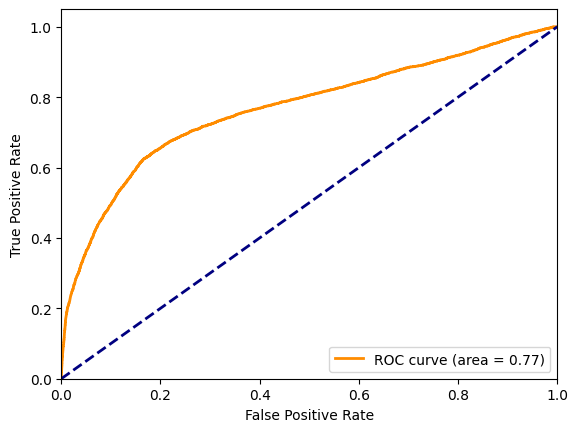

In [175]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

3. Assess the statistical significance of the regression coefficients. Describe the relationships between each predictor and dependent variable in detail. This is very important point of the task. We should understand clearly from the analysis which predictors influence the choice of the clients and how.

In [ ]:
# your code here


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
age,0.013,significant
campaign,0.000,significant
previous,0.003,significant
pdays,0.000,significant
euribor3m,0.000,significant
job_blue-collar,0.000,significant
job_entrepreneur,0.028,significant
job_housemaid,0.701,non-significant
job_management,0.046,significant


4. Do the model diagnostics. Conduct cross-validation of the model and describe the results obtained.

In [ ]:
# your code here

5. Make final conclusions based on the results of the regression analysis. Which of the data analysis results were expected for you, and which were unexpected?

In [ ]:
# your code here

Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional regression methods or create different specifications of the model and compare them.
- This task consists of five parts, the weight of each part in the overall assessment is as follows:
    1. 10%
    2. 20%
    3. 40%
    4. 20%
    5. 10%
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 6 November 23:55. 